In [12]:
print('tugas')

tugas


Gunakan dataset berikut untuk analisis dan visualisasi data.
Buatlah plot terdiri dari:
- bar chart
- line chart
- Heatmap
- Area chart
- Pie Chart
- Histogram
- Boxplot

Langkahnya:
1. Buatlah latar belakang.
2. Import libraries yang digunakan
3. Data Loading (menggunakan Kaggle API untuk mengambil data dari kaggle dan coba baca datanya)
4. EDA :
     - cek duplikasi data
     - cek missing values (jumlah data yang hilang tiap kolom, cek juga persetasenya, dan cek apakah ada data yg hilang tapi bukan None atau NaN, misalkan 'unknown')
     - Coba tangani data yang hilang dengan membuat fungsi untuk imputasi data yang hilang tersebut berdasrkan kondisi.
     - Lakukan analisis dan buat visualisasi. Misalkan analisis univariate dengan pie chart, analisis bivariate dan analisis multivariate. Boleh gunakan juga groupby atau agregat untuk membantu analisis.
5. Berikan Kesimpulan dari hasil analisis kalian. Misalkan kesimpulannya adalah banyak karyawan yang melakukan ketika salarynya rendah.


Wajib ada plot yang menggunakan subplots untuk melakukan plotting dalam beberapa kasus.


#Import Libraries yang digunakan

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Load data 
fn = "D:/Users/bsi80191/Downloads/sesi17/sesi 24/archive (1)/emplo_att.csv"
df = pd.read_csv(fn)

#menampilkan dataframe
df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [17]:
# cek kolom maszeh
df.columns.values 

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [18]:
df.shape

(1470, 35)

Cek Duplikasi Data 

In [19]:
df[df.duplicated()==True]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [20]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [21]:
df_n = df.copy()
df_na = df_n.select_dtypes('int64')
df_na

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [22]:
df_no = df_n.select_dtypes('object')
df_no

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [23]:
df_no.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [24]:
## klasifikasi dengan grup per departemen
df_n.groupby(['Department','JobRole','JobLevel'])['Attrition'].agg({'count'}).reset_index()

,Department,JobRole,JobLevel,count
0,Human Resources,Human Resources,1,33
1,Human Resources,Human Resources,2,13
2,Human Resources,Human Resources,3,6
3,Human Resources,Manager,4,4
4,Human Resources,Manager,5,7
5,Research & Development,Healthcare Representative,2,78
6,Research & Development,Healthcare Representative,3,44
7,Research & Development,Healthcare Representative,4,9
8,Research & Development,Laboratory Technician,1,200
9,Research & Development,Laboratory Technician,2,56


In [25]:
df_n.groupby(['BusinessTravel'])['Attrition'].agg({'count'}).reset_index()

,BusinessTravel,count
0,Non-Travel,150
1,Travel_Frequently,277
2,Travel_Rarely,1043


Text(0.5, 1.0, 'Persentase Attrition')

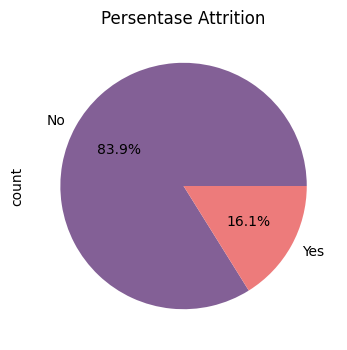

In [26]:
plt.figure(figsize=(5,4))
(df_n['Attrition'].value_counts()).plot.pie(autopct = "%1.1f%%", colors=['#836096', '#ED7B7B'])
plt.title('Persentase Attrition')

=================================

LATAR BELAKANG

Attrition dalam konteks ini memiliki definisi sebagai karyawan yang keluar dari company. 

Rumusan masalah:
Apa penyebab karyawan mengundurkan diri dari perusahaan?

--
Menemukan jenis faktor yang mempengaruhi kepuasan karyawan dengan menganalisis data attrition sehingga dapat memahami penyebab apa karyawan keluar dari perusahaan. 

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.

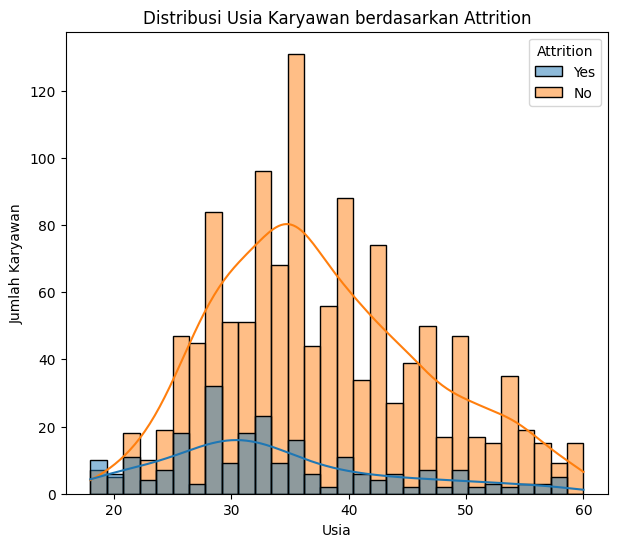

In [27]:
plt.figure(figsize=(7, 6))
sns.histplot(data=df, x='Age', hue='Attrition', bins=30, kde=True)
plt.title('Distribusi Usia Karyawan berdasarkan Attrition')
plt.xlabel('Usia')
plt.ylabel('Jumlah Karyawan')
plt.show()


D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.

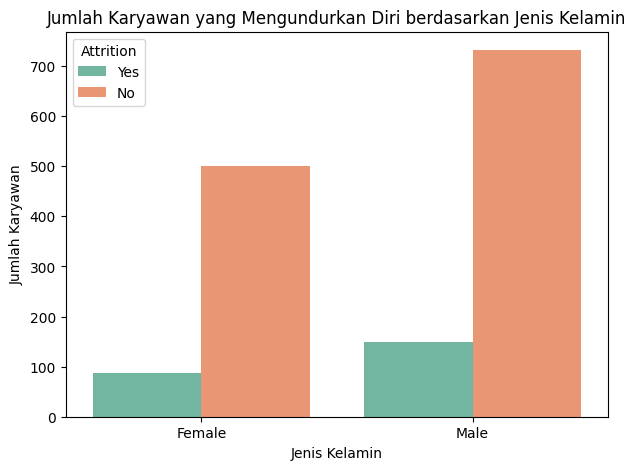

In [28]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='Gender', hue='Attrition', palette='Set2')

plt.title('Jumlah Karyawan yang Mengundurkan Diri berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Karyawan')

plt.show()


D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



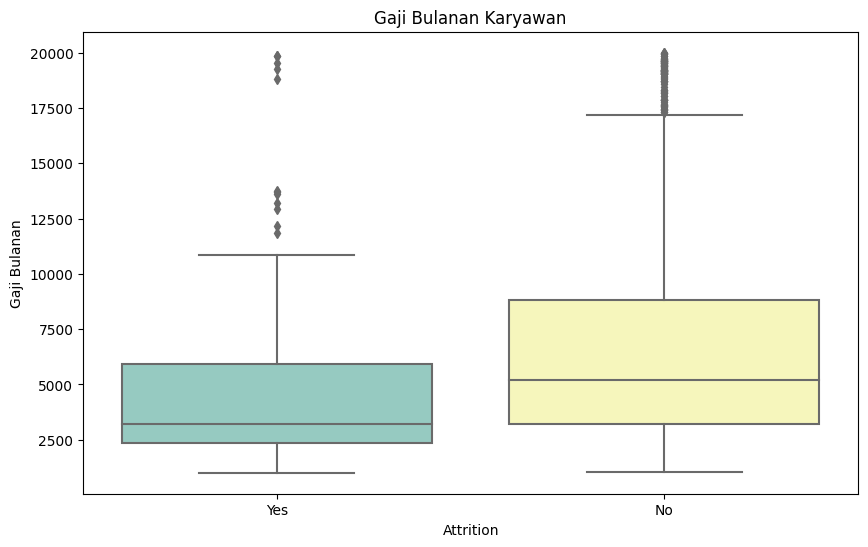

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set3')
plt.title('Gaji Bulanan Karyawan')
plt.xlabel('Attrition')
plt.ylabel('Gaji Bulanan')
plt.show()


Gaji rendah kemungkinan alasan untuk mengundurkan diri pada company ini

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



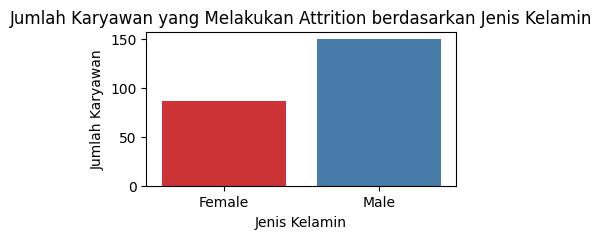

In [30]:
# Filter hanya data dengan Attrition "Yes"
attrition_df = df_n[df_n['Attrition'] == 'Yes']

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(4, 2))
sns.countplot(data=attrition_df, x='Gender', palette='Set1')
plt.title('Jumlah Karyawan yang Melakukan Attrition berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Karyawan')
plt.show()

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.

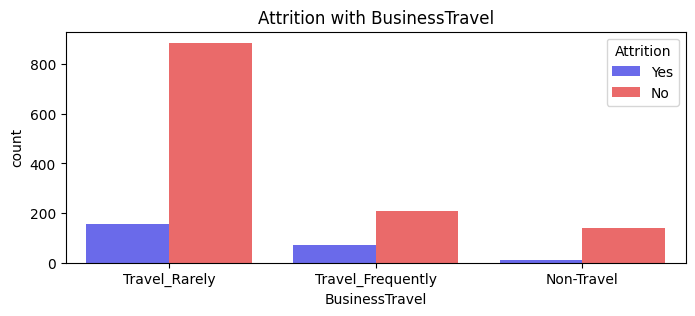

In [31]:
plt.figure(figsize=(8,3))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette='seismic')
plt.title("Attrition with BusinessTravel")
plt.show()

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



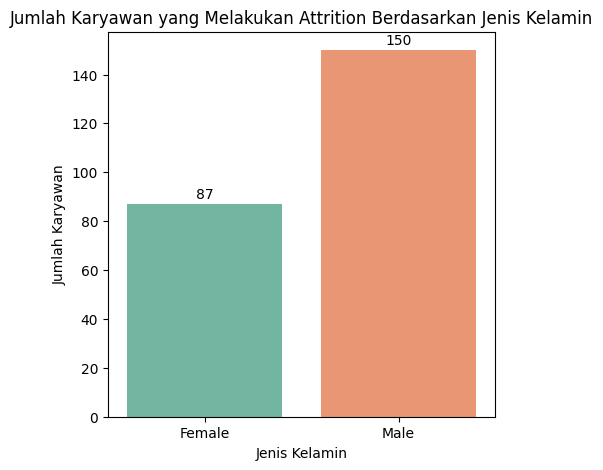

In [32]:
gender_attrition_counts = df[df['Attrition'] == 'Yes'].groupby('Gender').size().reset_index(name='Count')

# plot pakai seaborn
plt.figure(figsize=(5, 5))
sns.barplot(data=gender_attrition_counts, x='Gender', y='Count', palette='Set2')
plt.title('Jumlah Karyawan yang Melakukan Attrition Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=0)  # rotasi pada label x menjadi horizontal
for i, count in enumerate(gender_attrition_counts['Count']):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')  # nambahkan label bar
plt.show()

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.

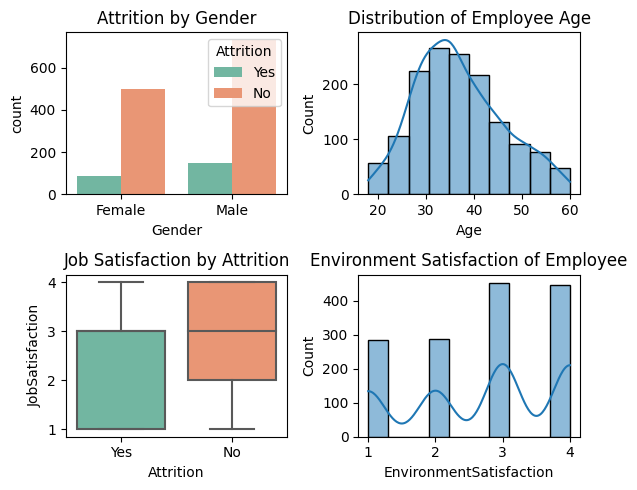

In [33]:

fig, axes = plt.subplots(2, 2, figsize=(6, 5))

sns.countplot(data=df_n, x='Gender', hue='Attrition', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Attrition by Gender')

sns.histplot(data=df_n, x='Age', bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Employee Age')

sns.boxplot(data=df_n, x='Attrition', y='JobSatisfaction', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Job Satisfaction by Attrition')

sns.histplot(data=df_n, x='EnvironmentSatisfaction', bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Environment Satisfaction of Employee')


plt.tight_layout()
plt.show()

In [34]:
import plotly.graph_objects as pg
import plotly.express as px

In [35]:
pip install plotly==5.17.0

D:\Users\bsi80191\AppData\Local\Temp\ipykernel_16404\1881652801.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will

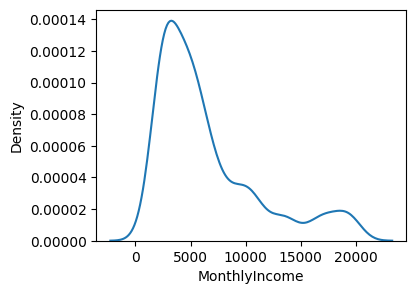

In [36]:
plt.figure(figsize=(4,3))
sns.distplot(df_n['MonthlyIncome'], hist=False)
plt.show()

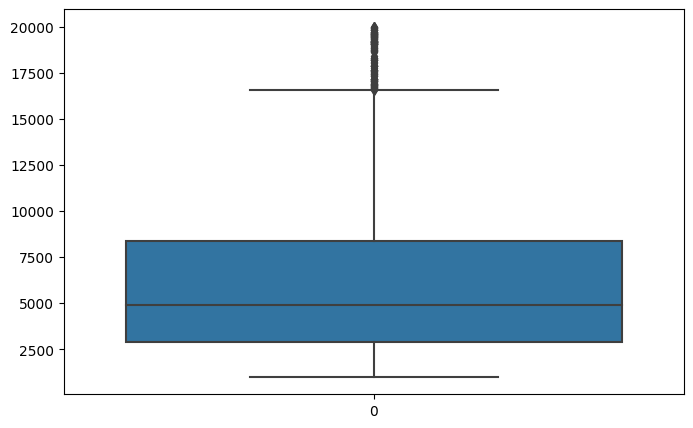

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(df_n['MonthlyIncome'])
plt.show()

In [38]:
attrition_moincom = df_n[['Attrition', 'MonthlyIncome']]

In [39]:
fig = px.box(attrition_moincom, x='Attrition', y='MonthlyIncome', color='Attrition', 
             points='all',color_discrete_map={'No': 'blue', 'Yes': 'red'})

fig.update_layout(
    title='Attrition berdasarkan Monthly Income',
    xaxis=dict(title='Attrition'),
    yaxis=dict(title='Monthly Income'),
    template='seaborn'
    
)

fig.show()

In [40]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install --upgrade nbformat

^C
Note: you may need to restart the kernel to use updated packages.


In [42]:
atr_yes = df_n.query("Attrition == 'Yes'")

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



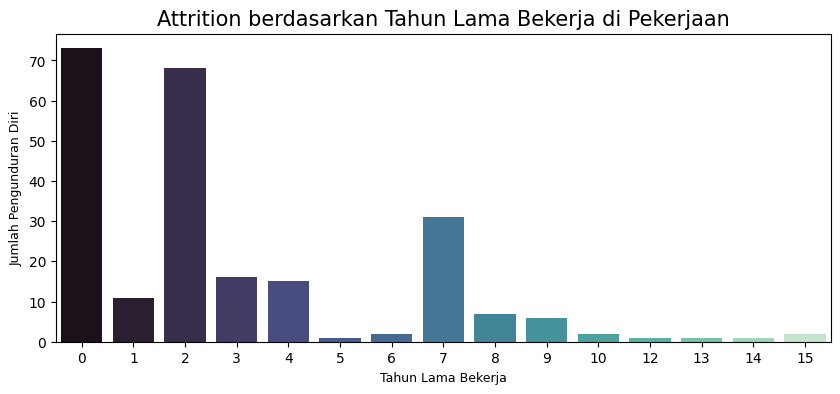

In [67]:
plt.figure(figsize=(10,4))
sns.countplot(x="YearsInCurrentRole", data=atr_yes, palette="mako")

plt.xticks(rotation='horizontal')
plt.title('Attrition berdasarkan Tahun Lama Bekerja di Pekerjaan', fontsize=15)
plt.ylabel('Jumlah Pengunduran Diri', fontsize=9)
plt.xlabel('Tahun Lama Bekerja', fontsize=9)
    
plt.show()

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Users\bsi80191\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



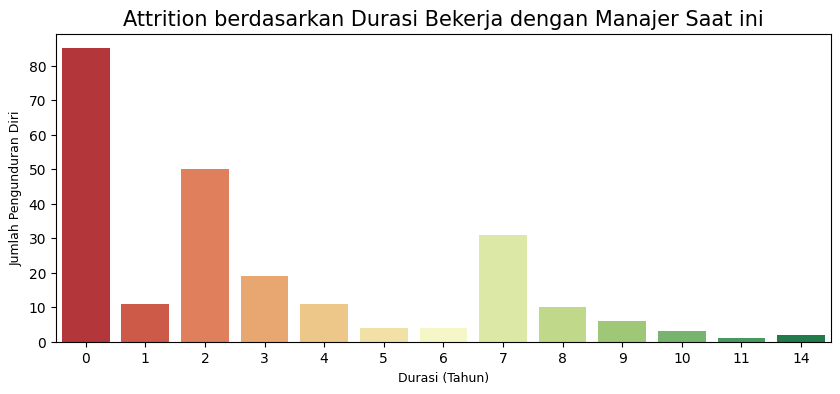

In [68]:
plt.figure(figsize=(10,4))

sns.countplot(x="YearsWithCurrManager", data=atr_yes, palette="RdYlGn")
plt.title('Attrition berdasarkan Durasi Bekerja dengan Manajer Saat ini', fontsize=15)
plt.ylabel('Jumlah Pengunduran Diri', fontsize=9)
plt.xlabel('Durasi (Tahun)', fontsize=9)
plt.show()

Data tersebut menampilkan gambaran bahwa pada saat Manager in charge situasi pada karyawan yang berada di perusahaan menunjukkan banyak yang memilih mengundurkan diri dengan durasi bekerja dengan manajer saat ini yang sangat rendah. Hal ini menunjukkan bahwa manajer saat ini juga memiliki pengaruh dari adanya attrition yang terjadi. Pada keadaan sebenarnya hal ini memberikan informasi bahwa salah satu alasan  mengapa orang keluar dari pekerjaan mereka adalah karena manajer yang kurang bertanggung jawab untuk memastikan kelayakan karyawan mereka tidak cukup terpenuhi kebutuhan mereka sebagai karyawan serta kurangnya apresiasi atau manajer yang toxic.

Selain itu, salary yang rendah membuat orang menjadi pindah dan ogah stay dalam perusahaan tersebut.